In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [5]:
zoo = pd.read_csv("Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [10]:
duplicates = zoo["animal name"].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [12]:
frog = zoo[zoo["animal name"] == "frog"]
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [16]:
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

In [17]:
zoo["venomous"].value_counts()

0    93
1     8
Name: venomous, dtype: int64

In [19]:
color_list = [("green" if i == 1 else "red" if i == 0 else "yellow") for i in zoo.hair]
unique_color = list(set(color_list))
unique_color

['green', 'red']

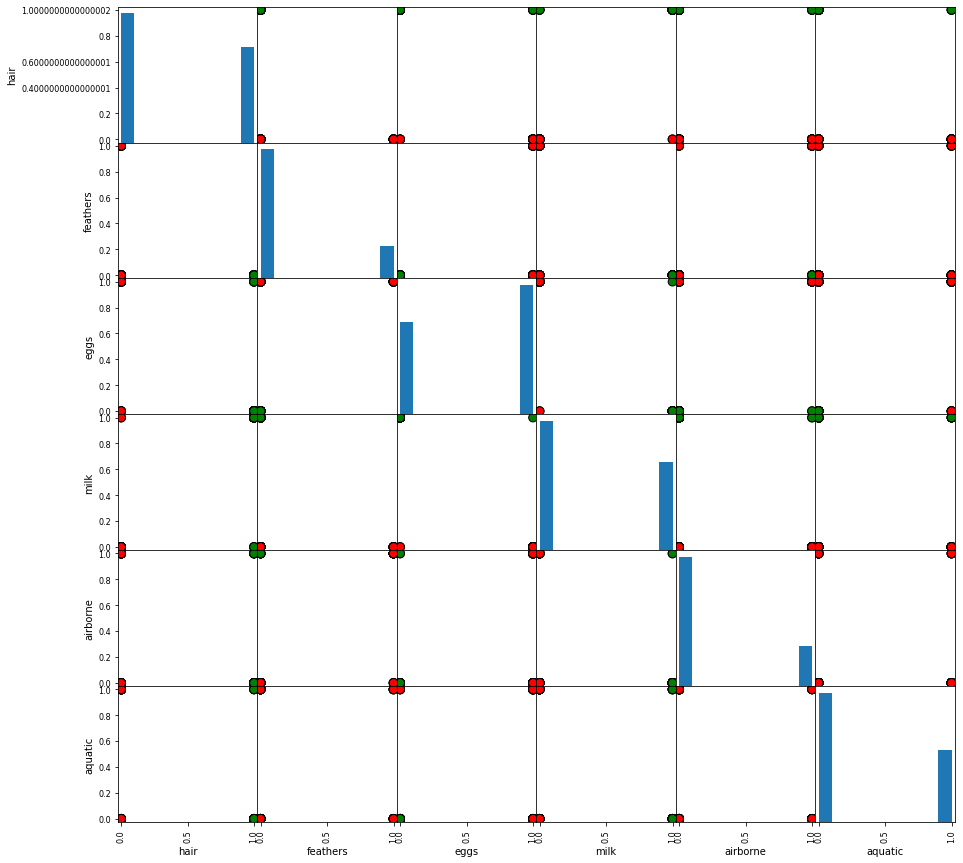

In [20]:
pd.plotting.scatter_matrix(zoo.iloc[:, :7],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = "hist",
                          alpha = 1, s = 300,
                          edgecolor = "black")
plt.show()

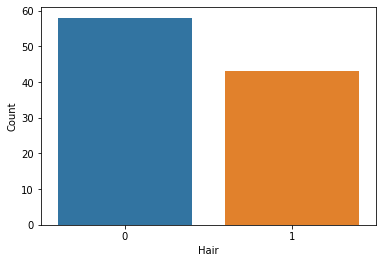

0    58
1    43
Name: hair, dtype: int64

In [21]:
sns.countplot(x = "hair", data = zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,"hair"].value_counts()

[]

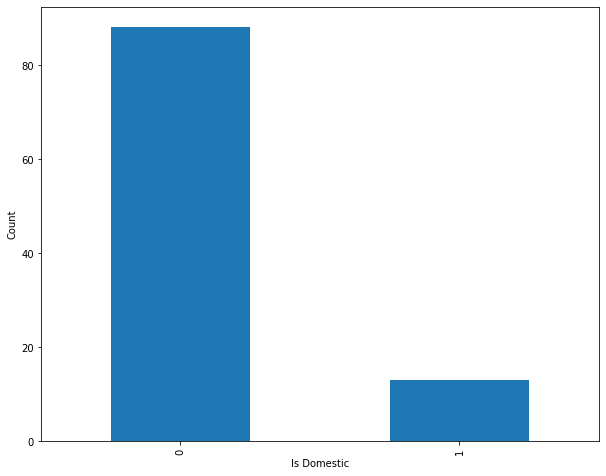

In [22]:
plt.figure(figsize = (10,8));
zoo["domestic"].value_counts().plot(kind = "bar");
plt.xlabel("Is Domestic");
plt.ylabel("Count");
plt.plot()

In [23]:
pd.crosstab(zoo["type"], zoo["domestic"])

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


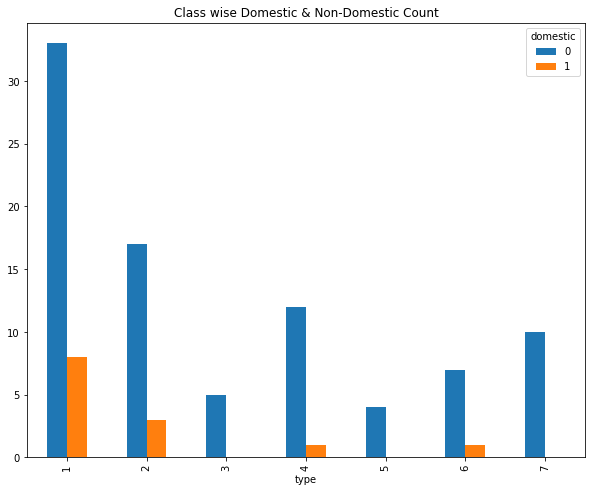

In [24]:
pd.crosstab(zoo["type"], zoo["domestic"]).plot(kind = "bar", figsize = (10,8), title="Class wise Domestic & Non-Domestic Count");
plt.plot();

In [25]:
zoo["milk"].value_counts()

0    60
1    41
Name: milk, dtype: int64

In [26]:
pd.crosstab(zoo["type"], zoo["milk"])

milk,0,1
type,,
1,0,41
2,20,0
3,5,0
4,13,0
5,4,0
6,8,0
7,10,0


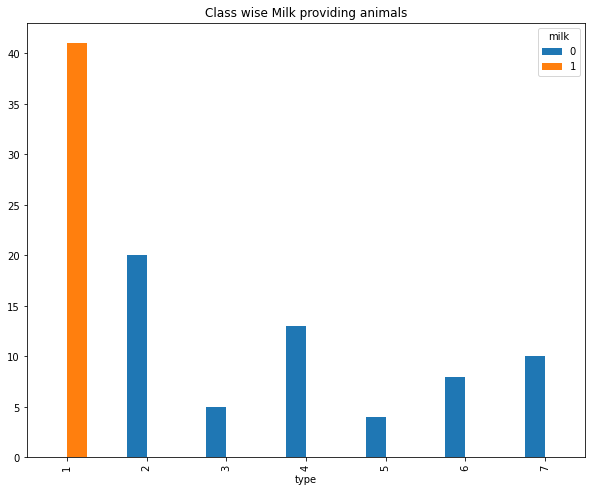

In [27]:
pd.crosstab(zoo["type"], zoo["milk"]).plot(kind = "bar", figsize = (10,8), title="Class wise Milk providing animals");
plt.plot();

In [28]:
zoo.aquatic.value_counts()

0    65
1    36
Name: aquatic, dtype: int64

In [29]:
zoo[zoo["aquatic"] == 1].type.value_counts()

4    13
7     6
2     6
1     6
5     4
3     1
Name: type, dtype: int64

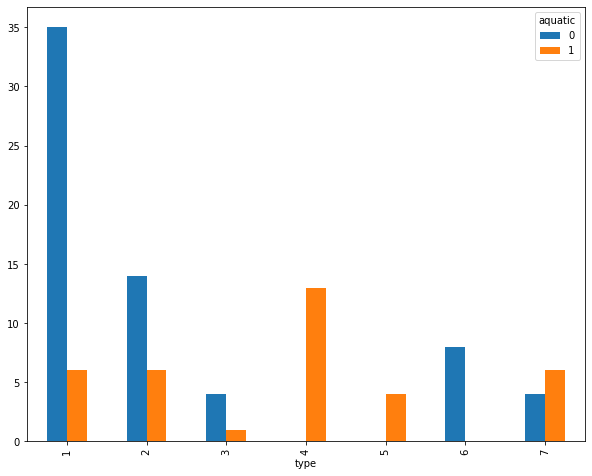

In [30]:
pd.crosstab(zoo["type"], zoo["aquatic"]).plot(kind = "bar", figsize = (10,8));

In [31]:
type = [i for i in zoo.type]
unique_type = list(set(type))
unique_type

[1, 2, 3, 4, 5, 6, 7]

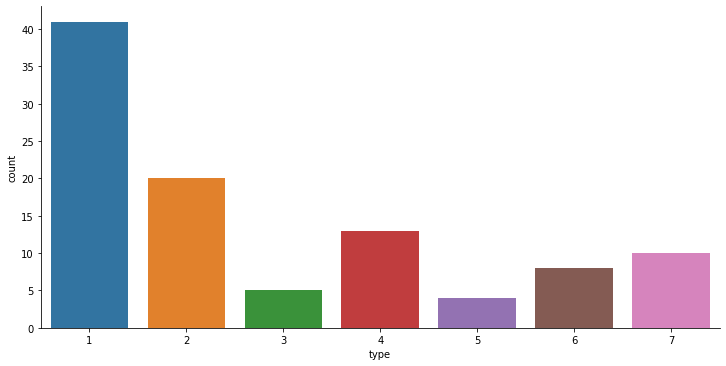

In [32]:
sns.factorplot("type", data = zoo, kind = "count", size = 5, aspect = 2)

In [33]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [114]:
X = zoo.iloc[:,1:16]
Y = zoo.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1905,stratify=Y)

In [115]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((70, 15), (31, 15), (70,), (31,))

In [116]:
num_folds = 10
kfold = KFold(n_splits = 10)

In [117]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [118]:
preds = model.predict(X_test)
pd.Series(preds).value_counts()

0    16
1    15
dtype: int64

In [119]:
pd.crosstab(Y_test, preds)

col_0,0,1
catsize,,
0,13,4
1,3,11


In [120]:
np.mean(preds == Y_test)

0.7741935483870968

In [121]:
model.score(X_train, Y_train)

0.8428571428571429

In [122]:
print("Accuracy", accuracy_score(Y_test, preds)*100)

Accuracy 77.41935483870968


In [123]:
results = cross_val_score(model, X, Y, cv = kfold)

In [124]:
print(results.mean()*100)

76.27272727272728


In [125]:
print(results.std()*100)

12.704199865197182


Grid Search for Algorithm Tuning

In [126]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [127]:
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator = model1, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [128]:
print(grid.best_score_)

0.790952380952381


In [129]:
print(grid.best_params_)

{'n_neighbors': 5}


In [130]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    train_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))

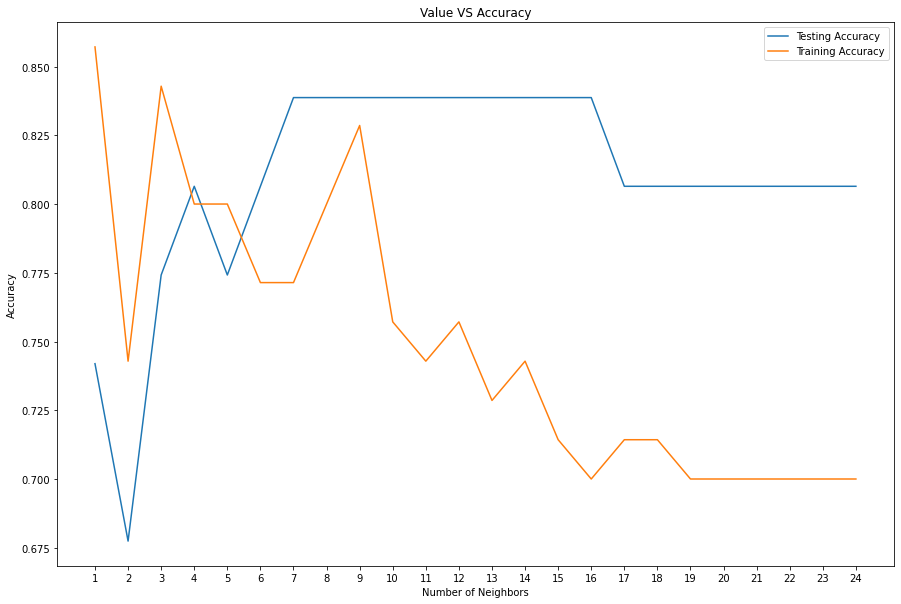

Best accuracy is 0.8387096774193549 with K = 7


In [131]:
plt.figure(figsize = [15, 10])
plt.plot(k_values, test_accuracy, label = "Testing Accuracy")
plt.plot(k_values, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.title("Value VS Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy), 1+test_accuracy.index(np.max(test_accuracy))))